In [2]:
import yfinance as yf

In [3]:
msft = yf.Ticker("MSFT")
msft = msft.history(period="max")
msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,424.700012,428.079987,423.890015,427.869995,14003000,0.0,0.0
2024-06-11 00:00:00-04:00,425.480011,432.820007,425.250000,432.679993,14551100,0.0,0.0
2024-06-12 00:00:00-04:00,435.320007,443.399994,433.250000,441.059998,22366200,0.0,0.0


<Axes: xlabel='Date'>

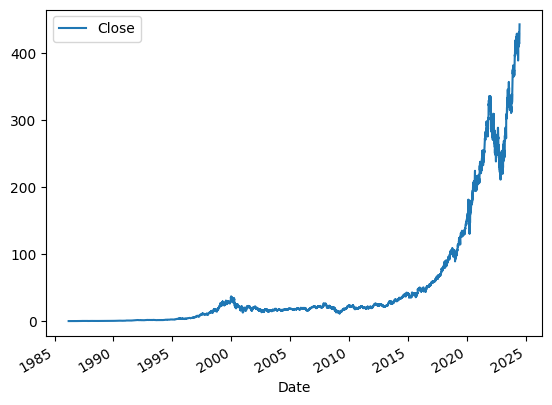

In [4]:
msft.plot.line(y="Close", use_index=True)

In [5]:
data  = msft[["Close"]]
data = data.rename(columns = {"Close":"actual_close"})
#data["Target"] = msft.shift(-1)["Close"]
data["Target"] = msft.rolling(2).apply(lambda x: x.iloc[-1]>x.iloc[0])["Close"]
data

,actual_close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060055,NaN
1986-03-14 00:00:00-05:00,0.062199,1.0
1986-03-17 00:00:00-05:00,0.063272,1.0
1986-03-18 00:00:00-05:00,0.061663,0.0
1986-03-19 00:00:00-05:00,0.060591,0.0
...,...,...
2024-06-10 00:00:00-04:00,427.869995,1.0
2024-06-11 00:00:00-04:00,432.679993,1.0
2024-06-12 00:00:00-04:00,441.059998,1.0


In [6]:
msft2 = msft.copy()
msft2 = msft2.shift(1)
msft2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,6.776640e+07,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,426.200012,426.279999,423.000000,423.850006,1.362170e+07,0.0,0.0
2024-06-11 00:00:00-04:00,424.700012,428.079987,423.890015,427.869995,1.400300e+07,0.0,0.0
2024-06-12 00:00:00-04:00,425.480011,432.820007,425.250000,432.679993,1.455110e+07,0.0,0.0


In [7]:
predictors = ["Open", "High", "Low", "Close", "Volume"]
data = data.join(msft2[predictors]).iloc[1:]
data


,actual_close,Target,Open,High,Low,Close,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062199,1.0,0.054693,0.062736,0.054693,0.060055,1.031789e+09
1986-03-17 00:00:00-05:00,0.063272,1.0,0.060055,0.063272,0.060055,0.062199,3.081600e+08
1986-03-18 00:00:00-05:00,0.061663,0.0,0.062199,0.063808,0.062199,0.063272,1.331712e+08
1986-03-19 00:00:00-05:00,0.060591,0.0,0.063272,0.063808,0.061127,0.061663,6.776640e+07
1986-03-20 00:00:00-05:00,0.058982,0.0,0.061663,0.062199,0.060055,0.060591,4.789440e+07
...,...,...,...,...,...,...,...
2024-06-10 00:00:00-04:00,427.869995,1.0,426.200012,426.279999,423.000000,423.850006,1.362170e+07
2024-06-11 00:00:00-04:00,432.679993,1.0,424.700012,428.079987,423.890015,427.869995,1.400300e+07
2024-06-12 00:00:00-04:00,441.059998,1.0,425.480011,432.820007,425.250000,432.679993,1.455110e+07


In [8]:
data.index

DatetimeIndex(['1986-03-14 00:00:00-05:00', '1986-03-17 00:00:00-05:00',
               '1986-03-18 00:00:00-05:00', '1986-03-19 00:00:00-05:00',
               '1986-03-20 00:00:00-05:00', '1986-03-21 00:00:00-05:00',
               '1986-03-24 00:00:00-05:00', '1986-03-25 00:00:00-05:00',
               '1986-03-26 00:00:00-05:00', '1986-03-27 00:00:00-05:00',
               ...
               '2024-06-03 00:00:00-04:00', '2024-06-04 00:00:00-04:00',
               '2024-06-05 00:00:00-04:00', '2024-06-06 00:00:00-04:00',
               '2024-06-07 00:00:00-04:00', '2024-06-10 00:00:00-04:00',
               '2024-06-11 00:00:00-04:00', '2024-06-12 00:00:00-04:00',
               '2024-06-13 00:00:00-04:00', '2024-06-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=9641, freq=None)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [10]:
 from sklearn.metrics import precision_score
 preds = model.predict(test[predictors])
 preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
import pandas as pd
preds = pd.Series(preds, index=test.index)
preds

Date
2024-01-24 00:00:00-05:00    1.0
2024-01-25 00:00:00-05:00    1.0
2024-01-26 00:00:00-05:00    1.0
2024-01-29 00:00:00-05:00    1.0
2024-01-30 00:00:00-05:00    1.0
                            ... 
2024-06-10 00:00:00-04:00    1.0
2024-06-11 00:00:00-04:00    1.0
2024-06-12 00:00:00-04:00    1.0
2024-06-13 00:00:00-04:00    1.0
2024-06-14 00:00:00-04:00    1.0
Length: 100, dtype: float64

In [12]:
precision_score(test["Target"], preds)

0.52

In [13]:
combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
combined

,Target,Predictions
Date,,
2024-01-24 00:00:00-05:00,1.0,1.0
2024-01-25 00:00:00-05:00,1.0,1.0
2024-01-26 00:00:00-05:00,0.0,1.0
2024-01-29 00:00:00-05:00,1.0,1.0
2024-01-30 00:00:00-05:00,0.0,1.0
...,...,...
2024-06-10 00:00:00-04:00,1.0,1.0
2024-06-11 00:00:00-04:00,1.0,1.0
2024-06-12 00:00:00-04:00,1.0,1.0


<Axes: xlabel='Date'>

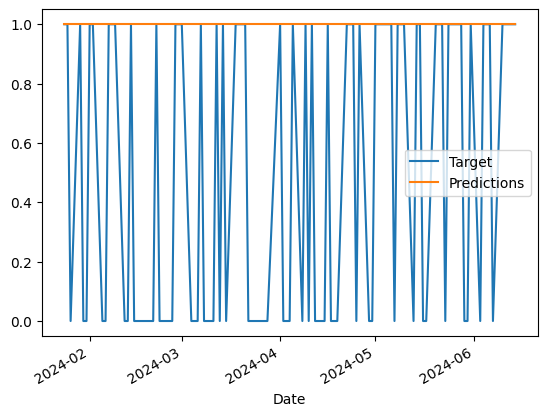

In [14]:
combined.plot()

In [29]:
start = 1000
step = 500
def backtest(data, model, predictors, start=1000, step=500):
  predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[:i].copy()
    test = data.iloc[i:(i+step)].copy()

    model.fit(train[predictors], train["Target"])

    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds <= .6] = 0

    combined = pd.concat({"Target": test["Target"], "predictions": preds}, axis=1)

    predictions.append(combined)

  predictions = pd.concat(predictions)
  return predictions




In [30]:
predictions["predictions"].value_counts()

predictions
0.0    7437
1.0    1204
Name: count, dtype: int64

In [31]:
precision_score(predictions["Target"], predictions["predictions"])

0.5290697674418605

In [32]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [33]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [34]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [35]:
precision_score(predictions["Target"], predictions["predictions"])

0.5494296577946768

In [37]:
predictions["predictions"].value_counts()

predictions
0.0    7750
1.0     526
Name: count, dtype: int64

<Axes: xlabel='Date'>

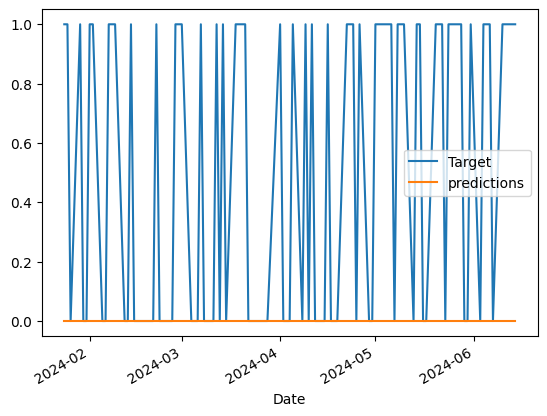

In [38]:
predictions.iloc[-100:].plot()